# Домашее задание №3

## Задание 1

В файле Worldbank_tech.xlsx содержаться данные Всемирного банка по ряду показателей за 2015 год. В файле следующие переменные:
    
    - country_name: Country Name
    - country_code: Country Code
    - internet: Internet users (per 100 people)
    - secure: Secure Internet servers (per 1 million people)
    - export: Communications, computer, etc. (% of service exports)
    - import: Communications, computer, etc. (% of service imports)
    - telephone: Fixed telephone subscriptions (per 100 people)
    - hightech: High-technology exports (current US$)
    - mobile: Mobile cellular subscriptions (per 100 people)
    

Проведите иерархический кластерный анализ данных с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

1.	Выберите оптимальный алгоритм кластеризации и обоснуйте свой выбор.


2.	Создайте дендрограмму, опишите её.


3.	Определите число кластеров, объясните своё решение.


4.	Опишите получившиеся кластеры на основе описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.


5.	Дайте названия кластерам и обоснуйте их.


6.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

### Решение:

Перед тем, как выбрать алгоритм кластеризации, определим переменные, которые возьмем: internet, secure, hightech, mobile - так как они метрические и не коррелируют между собой, чтобы кластеризовать страны на основе их технологического развития. Для алгоритма кластеризации используем метод Варда, так как он подходит для небольшого количества объектов и интеллектуально отбирает кластеры, стараясь минимизировать отклонения значений от центра.

In [1]:
import pandas as pd
df = pd.read_excel('Worldbank_tech.xlsx')
df['z_internet'] = (df['internet'] - df['internet'].mean())/df['internet'].std()
df['z_mobile'] = (df['mobile'] - df['mobile'].mean())/df['mobile'].std()
df['z_secure'] = (df['secure'] - df['secure'].mean())/df['secure'].std()
df['z_hightech'] = (df['hightech'] - df['hightech'].mean())/df['hightech'].std()
df[['z_internet', 'z_mobile', 'z_secure', 'z_hightech']].dropna()

,z_internet,z_mobile,z_secure,z_hightech
1,0.505634,-0.031721,-0.372812,-0.268380
2,-0.357296,0.125401,-0.403661,-0.268608
6,0.572699,0.696890,-0.138499,-0.268653
7,0.717397,0.854836,-0.350395,-0.242648
8,0.333288,0.175352,-0.362889,-0.268453
...,...,...,...,...
207,0.552033,1.239953,-0.312372,-0.263855
213,0.304867,-0.711047,-0.400936,-0.268561
214,-0.808533,-0.938870,-0.405338,-0.268599
215,-0.949738,-0.785530,-0.402107,-0.267994


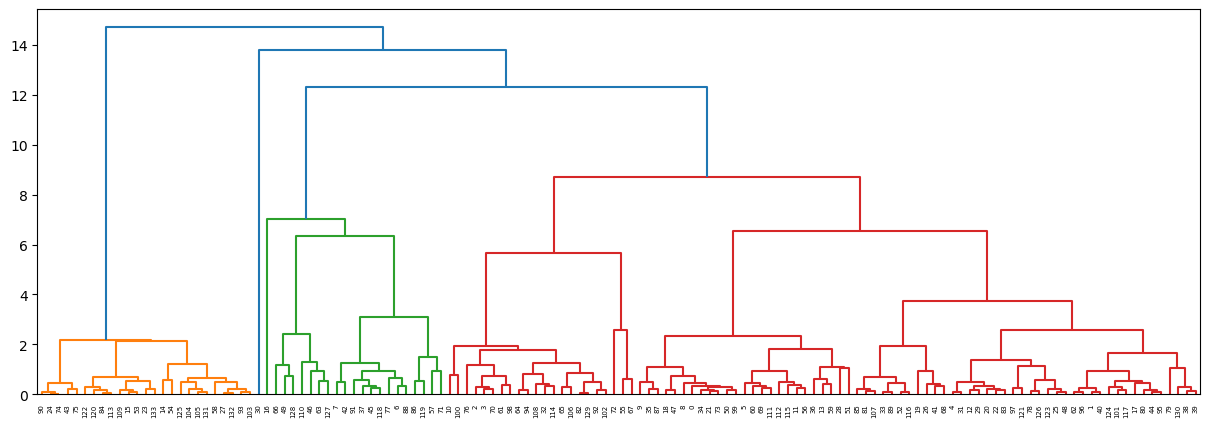

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df[['z_internet', 'z_mobile', 'z_secure', 'z_hightech']].dropna(), 'ward'))

Дендрограмма получилась достаточно очевидной, сразу видно, как можно разделить данные. Как мне кажется, лучше разделить на 7 кластеров - это будет наиболее оптимальным количеством, поскольку при таком количестве они будут равнозначны по численности и расстояния между точками будет не таким большим. Но есть 2 кластера, которые выбиваются из остальных и содержат в себе только одну страну. Это страны-выбросы, которые выбиваются из всей статистики и на графике были бы отдельными удаленными точками.

In [3]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(df[['z_internet', 'z_mobile', 'z_secure', 'z_hightech']].dropna(), method='ward', metric='euclidean') 
labels = fcluster(Z, t=7, criterion='maxclust') 
calinski_harabasz_score(df[['z_internet', 'z_mobile', 'z_secure', 'z_hightech']].dropna(), labels)

83.71961030915081

In [4]:
labels = fcluster(Z, t=7, criterion='maxclust') #проводим рассчёты для 7-и кластеров
labels

array([5, 6, 4, 4, 6, 5, 2, 2, 5, 5, 4, 5, 6, 5, 1, 1, 3, 6, 5, 6, 6, 5,
       6, 1, 1, 6, 6, 1, 5, 6, 7, 6, 4, 6, 5, 5, 5, 2, 6, 6, 6, 6, 2, 1,
       6, 2, 2, 5, 6, 2, 5, 5, 6, 1, 1, 4, 5, 2, 1, 5, 5, 4, 6, 2, 4, 4,
       2, 4, 6, 5, 4, 2, 4, 5, 1, 1, 4, 2, 6, 6, 6, 6, 4, 6, 1, 6, 2, 5,
       2, 6, 1, 2, 4, 1, 4, 6, 6, 6, 4, 5, 4, 6, 4, 1, 1, 1, 4, 6, 4, 1,
       2, 5, 5, 1, 4, 5, 6, 6, 2, 2, 1, 6, 1, 6, 6, 1, 6, 2, 2, 4, 6, 1,
       1, 1], dtype=int32)

#### Описательная статистика по кластерам:

In [5]:
df1 = df[['country_name', 'country_code', 'internet', 'mobile', 'secure', 'hightech']].dropna() # Убираем все значения NaN
df1

,country_name,country_code,internet,mobile,secure,hightech
1,Albania,ALB,63.252933,106.380207,37.727137,1.512366e+07
2,Algeria,DZA,38.200000,113.031094,2.546228,2.449466e+06
6,Antigua and Barbuda,ATG,65.200000,137.222017,304.951099,0.000000e+00
7,Argentina,ARG,69.400921,143.907797,63.293537,1.442451e+09
8,Armenia,ARM,58.249332,115.145509,49.043779,1.106779e+07
...,...,...,...,...,...,...
207,Uruguay,URY,64.600000,160.209644,106.657186,2.661192e+08
213,West Bank and Gaza,WBG,57.424192,77.624612,5.653368,5.099724e+06
214,"Yemen, Rep.",YEM,25.099514,67.980973,0.633567,2.946931e+06
215,Zambia,ZMB,21.000000,74.471778,4.317851,3.650318e+07


In [6]:
df1['culster_labels'] = labels # создаём новую переменную, отражающую принадлежность наблюдения к кластеру
df1

,country_name,country_code,internet,mobile,secure,hightech,culster_labels
1,Albania,ALB,63.252933,106.380207,37.727137,1.512366e+07,5
2,Algeria,DZA,38.200000,113.031094,2.546228,2.449466e+06,6
6,Antigua and Barbuda,ATG,65.200000,137.222017,304.951099,0.000000e+00,4
7,Argentina,ARG,69.400921,143.907797,63.293537,1.442451e+09,4
8,Armenia,ARM,58.249332,115.145509,49.043779,1.106779e+07,6
...,...,...,...,...,...,...,...
207,Uruguay,URY,64.600000,160.209644,106.657186,2.661192e+08,4
213,West Bank and Gaza,WBG,57.424192,77.624612,5.653368,5.099724e+06,6
214,"Yemen, Rep.",YEM,25.099514,67.980973,0.633567,2.946931e+06,1
215,Zambia,ZMB,21.000000,74.471778,4.317851,3.650318e+07,1


In [7]:
df1.groupby('culster_labels')[['internet', 'mobile', 'secure', 'hightech']].mean()

,internet,mobile,secure,hightech
culster_labels,,,,
1,15.375580,66.117425,21.632488,5.666937e+08
2,88.923324,128.911202,1844.562350,5.154521e+10
3,98.323610,57.946262,7204.721392,1.013119e+06
4,69.783632,173.458699,225.513049,5.353907e+09
5,75.019654,109.022340,462.671554,6.654349e+09
6,42.814826,115.343086,50.781874,3.205739e+09
7,50.300000,93.161421,10.117268,5.542729e+11


In [8]:
df1[['internet', 'mobile', 'secure', 'hightech']].mean()

internet    5.548361e+01
mobile      1.159525e+02
secure      4.716884e+02
hightech    1.501283e+10
dtype: float64

In [9]:
df1['culster_labels'].value_counts()

6    40
5    25
1    25
4    22
2    20
3     1
7     1
Name: culster_labels, dtype: int64

### Кластер 1 - "Менее продвинутые страны"

В этот кластер попали страны, которые характеризуются относительно низким уровнем доступа к интернету, мобильной связи и уровнем безопасности, а также небольшим количеством экспортом технологий. Это страны технологически слабо развиты.

### Кластер 2 - "Технологически развитые страны"

В этот кластер попали страны, которые характеризуются высоким уровнем доступа к интернету, мобильной связи и уровнем безопасности, и большим экспортом в технологии других стран. Эти страны во всех областях отлично технологически развиты.

### Кластер 3 - "Страна-выброс с очень большой безопасностью"

Этот кластер составляет всего одна страна, поскольку имеет, по сравнению с другими странами, очень высокий уровень защиты. Также в ней средний уровень интернета, а остальные параметры ниже среднего.

### Кластер 4 - "Мобильно развитые страны"

В этот кластер входят страны, где большая часть населения имеет технологии мобильной связи и которые имеют большую часть экспорта. Остальные параметры ниже среднего, что нам может показать, что в этих странах основной упор идет на мобильные технологии. 

### Кластер 5 - "Среднеразвитые страны"

В этот кластер попали страны, которые характеризуются средним уровнем доступа к интернету, мобильной связи, уровнем безопасности и экспортом в технологии других стран. Эти страны во всех областях хорошо технологически развиты.

### Кластер 6 - "Страны с плохоразвитым интернетом"

В этот кластер попали страны, которые имеют средний объем населения, которые пользуются мобильной связью, но плохо развиты интернет возможности, поскольку безопасность и часть населения, которые пользуются интернетом, очень низкие. Экспортом страны занимаются, но ниже среднего.

### Кластер 7 - "Страна-выброс с очень большим экспортом"

Этот кластер составляет всего одна страна, поскольку имеет, по сравнению с другими странами, очень высокий уровень экспорта. Также в ней очень слабая защита и пользуется интернетом незначительная часть населения, и средняя мобильная связь.

### Общий вывод

В целом, полученные результаты соответствуют моим ожиданиям, поскольку я предполагал, что многие страны будут схожи по уровню технологий, а некоторые будут сильно выбиваться ввиду своих особеностей. Однако, одна страна с очень высоким экспортом удивила, поскольку в других параметрах у неё нет выделяющихся параметров, значит она выделяется в том параметре, который мы не рассматривали. 


## Задание 2

В файле Video_Games_Sales.csv содержаться данные о продажах видеоигр.
Источник: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

В файле следующие переменные::
    
    - Name: The game’s name
    - Platform: Platform of the game’s release (i.e. PC, PS4, etc.)
    - Year_of_Release: Year of the game's release
    - Genre: Genre of the game
    - Publisher: Publisher of the game
    - NA_Sales: Sales in North America (in millions)
    - EU_Sales: Sales in Europe (in millions)
    - JP_Sales: Sales in Japan (in millions)
    - Other_Sales: Sales in the rest of the world (in millions)
    - Global_Sales: Total worldwide sales.
    - Critic_score: Aggregate score compiled by Metacritic staff
    - Criticcount: The number of critics used in coming up with the Criticscore
    - User_score: Score by Metacritic's subscribers
    - Usercount: Number of users who gave the userscore
    - Developer: Party responsible for creating the game
    - Rating: The ESRB ratings


Проведите кластерный анализ по методу k-средних с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

1.	Определите число кластеров, объясните своё решение.


2.	Опишите получившиеся кластеры с помощью описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.


3.	Дайте названия кластерам и обоснуйте их.


4.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?


In [81]:
import pandas as pd
df2 = pd.read_csv("video_games_sales.csv")
df2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Заметим, что метрическими переменными тут являются Year_of_Release, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count. Для решения задания выберем следующий 4 метрические переменные: NA_Sales, EU_Sales, Critic_Score, User_Score. Чтобы приступить к кластерному анализу данных переменных, нужно убедиться, что между ними нет корреляции. Для выбора коэффициента корелляции для начала определим, значимо ли отличается распределение от нормального. Так как в нашей выборке больше 50 измерений, то будем использовать тест Колмогорова-Смирнова в каждом из случаев, чтобы это определить

In [82]:
from scipy import stats

В процессе рассчета нормальности распределения выяснилось, что User_Score не является метрической переменной, так как содержит некие значения "tbd" (см столбик ниже). В связи с этим заменим переменную User_Score на переменную Critic_Count. То есть будем проводить кластерный анализ по следующим 4 переменным: **NA_Sales, EU_Sales, Critic_Score, Critic_Count**

In [83]:
df2['User_Score'].dropna()

0          8
2        8.3
3          8
6        8.5
7        6.6
        ... 
16702    tbd
16706    7.2
16708    tbd
16709    5.8
16710    tbd
Name: User_Score, Length: 10015, dtype: object

In [84]:
print(stats.kstest(df2.NA_Sales.dropna(), 'norm', args=(df2.NA_Sales.mean(), df2.NA_Sales.std())))
print(stats.kstest(df2.EU_Sales.dropna(), 'norm', args=(df2.EU_Sales.mean(), df2.EU_Sales.std())))
print(stats.kstest(df2.Critic_Score.dropna(), 'norm', args=(df2.Critic_Score.mean(), df2.Critic_Score.std())))
print(stats.kstest(df2.Critic_Count.dropna(), 'norm', args=(df2.Critic_Count.mean(), df2.Critic_Count.std())))

KstestResult(statistic=0.37308448671051514, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
KstestResult(statistic=0.386613115934036, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
KstestResult(statistic=0.0671878653751175, pvalue=2.2142417290873675e-32, statistic_location=70.0, statistic_sign=-1)
KstestResult(statistic=0.11925652222295262, pvalue=2.699062020128389e-101, statistic_location=4.0, statistic_sign=-1)


Во всех 4 случаях $pvalue \leq 0.05 \Rightarrow$ гипотеза Н1 (распределение значимо отличается от нормального) во всех 4 случаях будет принята. Таким образом, мы можем использовать либо коэффициент корелляции Спирмена, либо Кендалла, но так как в коэффициенте корреляции Кендалла значения **не обязательно** уникальны, то посчитаем его для каждой пары переменных, построив матрицу коэффициентов корреляции Кендалла

In [85]:
df2[['NA_Sales', 'EU_Sales', 'Critic_Score', 'Critic_Count']].corr('kendall')

,NA_Sales,EU_Sales,Critic_Score,Critic_Count
NA_Sales,1.000000,0.554919,0.222383,0.237456
EU_Sales,0.554919,1.000000,0.264133,0.273875
Critic_Score,0.222383,0.264133,1.000000,0.308970
Critic_Count,0.237456,0.273875,0.308970,1.000000


Из таблицы видно, что почти все значения (естественно, кроме диагональных) лежат в интервале (0.2, 0.5], что говорит о слабом коэффициенте корреляции, но коэффициент корреляции между NA_Sales и EU_Sales лежит в интервале (0.5, 0.7], что говорит о средней корреляции между этими переменными. Это не очень хорошо для проведения кластерного анализа, так как мы хотим анализировать слабо коррелирующие переменные. В связи с этим вместо EU_Sales попробуем подобрать другую переменную, которая изменит матрицу коэффициентов таким образом, чтобы каждая пара переменных имела слабую или очень слабую корреляцию. Возьмем вместо EU_Sales JP_Sales

In [86]:
print(stats.kstest(df2.JP_Sales.dropna(), 'norm', args=(df2.JP_Sales.mean(), df2.JP_Sales.std())))

KstestResult(statistic=0.40079591197270475, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)


$pvalue \leq 0.05 \Rightarrow$ распределение значимо отличается от нормального => будем считать коэффициент корреляции Кендалла. Посчитаем новую матрицу коэффициентов корреляции 

In [87]:
df2[['NA_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count']].corr('kendall')

,NA_Sales,JP_Sales,Critic_Score,Critic_Count
NA_Sales,1.000000,-0.18321,0.222383,0.237456
JP_Sales,-0.183210,1.00000,0.194230,0.262730
Critic_Score,0.222383,0.19423,1.000000,0.308970
Critic_Count,0.237456,0.26273,0.308970,1.000000


Теперь в соответствии с таблицей интерпретации значений коэффициентов корреляции у нас любая пара переменных (кроме диагональных) либо слабо коррелирует, либо очень слабо коррелирует, а значит, мы можем приступать к кластерному анализу. Для начала стандартизируем выбранные переменные, чтобы они имели схожую шкалу измерения

In [88]:
df2['z_NA_Sales'] = (df2['NA_Sales'] - df2['NA_Sales'].mean()) / df2['NA_Sales'].std()
df2['z_JP_Sales'] = (df2['JP_Sales'] - df2['JP_Sales'].mean()) / df2['JP_Sales'].std()
df2['z_Critic_Score'] = (df2['Critic_Score'] - df2['Critic_Score'].mean()) / df2['Critic_Score'].std()
df2['z_Critic_Count'] = (df2['Critic_Count'] - df2['Critic_Count'].mean()) / df2['Critic_Count'].std()
df2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,z_NA_Sales,z_JP_Sales,z_Critic_Score,z_Critic_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,50.517481,11.956547,0.504537,1.298132
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,35.422470,21.800530,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,18.950716,12.021310,0.935010,2.457216
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,18.864670,10.369852,0.791519,2.457216
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,13.529788,32.842630,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,-0.323695,-0.218906,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,-0.323695,-0.251288,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,-0.323695,-0.218906,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,-0.311403,-0.251288,NaN,NaN


In [89]:
X = df2[['z_NA_Sales', 'z_JP_Sales', 'z_Critic_Score', 'z_Critic_Count']].dropna() # исключаем строки, содержащие NaN, чтобы
# работал KMeans
X

,z_NA_Sales,z_JP_Sales,z_Critic_Score,z_Critic_Count
0,50.517481,11.956547,0.504537,1.298132
2,18.950716,12.021310,0.935010,2.457216
3,18.864670,10.369852,0.791519,2.457216
6,13.542080,20.796703,1.437228,2.035731
7,16.836431,9.236499,-0.786881,0.771275
...,...,...,...,...
16700,-0.311403,-0.251288,-0.571645,-0.756609
16701,-0.311403,-0.251288,-1.145608,-1.178095
16702,-0.311403,-0.251288,-1.504336,-0.861981
16706,-0.323695,-0.251288,-0.643390,-0.756609


In [90]:
import warnings
warnings.filterwarnings("ignore") # чтобы не было warning'ов

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
for k in range(2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(X, labels)))

Число кластеров: 2, индекс 2789.0233228393186
Число кластеров: 3, индекс 3118.753449868493
Число кластеров: 4, индекс 3193.394378801001
Число кластеров: 5, индекс 3117.2091683152007
Число кластеров: 6, индекс 3153.022050423503
Число кластеров: 7, индекс 3073.1505323831193
Число кластеров: 8, индекс 3053.5308359112237
Число кластеров: 9, индекс 3040.0462305884917
Число кластеров: 10, индекс 3089.5055947021906
Число кластеров: 11, индекс 3212.9264489525585
Число кластеров: 12, индекс 3230.0769277489417
Число кластеров: 13, индекс 3243.752385064007
Число кластеров: 14, индекс 3225.027940763525


Чтобы описание было как можно более общим, выберем число кластеров 4 (для него индекс довольно большой и при этом число кластеров не слишком большое). Добавим в датафрейм X принадлежность кластеру (в датафрейме X исключены строки со значениями NaN)

In [92]:
X['Cluster'] = KMeans(n_clusters=4).fit_predict(X)
X

,z_NA_Sales,z_JP_Sales,z_Critic_Score,z_Critic_Count,Cluster
0,50.517481,11.956547,0.504537,1.298132,2
2,18.950716,12.021310,0.935010,2.457216,2
3,18.864670,10.369852,0.791519,2.457216,2
6,13.542080,20.796703,1.437228,2.035731,2
7,16.836431,9.236499,-0.786881,0.771275,2
...,...,...,...,...,...
16700,-0.311403,-0.251288,-0.571645,-0.756609,3
16701,-0.311403,-0.251288,-1.145608,-1.178095,3
16702,-0.311403,-0.251288,-1.504336,-0.861981,3
16706,-0.323695,-0.251288,-0.643390,-0.756609,3


In [93]:
X.groupby('Cluster').mean()

,z_NA_Sales,z_JP_Sales,z_Critic_Score,z_Critic_Count
Cluster,,,,
0,0.529527,0.059658,0.745587,1.497824
1,-0.029042,-0.149106,0.427438,-0.322473
2,7.496739,6.370734,1.248896,1.587080
3,-0.152745,-0.212053,-1.186391,-0.575669


In [94]:
X['Cluster'].value_counts()

1    3819
3    2528
0    1726
2      64
Name: Cluster, dtype: int64

# Описание кластеров

## Кластер 0 (игры-середняки)
Это некие игры-середняки. Их выше среднего продали в США и Японии, критики дали на них много оценок, причём средняя оценка критика - сильно выше средней. Это не плохие и не супер хорошие игры и среднего обывателя они наверняка устроят
## Кластер 1 (чёрные лошадки)
Это похоже на чёрные лошадки. Такие игры продали ниже среднего в США и Японии, критики редко по ним давали отзыв, но при этом отзывы эти были чаще положительные, чем отрицательные. Скорее всего это игры также от безызвестных разработчиков, но довольно качественные и проработанные, раз критики дали на них много положительных отзывов. Такая игра для простого обывателя может быть приятной и неожиданной находкой
## Кластер 2 (игры-звезды)
Это настоящие игры-звезды, мастодонты игровой индустрии, в которые играет много людей (судя по продажам в США и Японии, они существенно выше среднего), критики дают много отзывов на эти игры и эти отзывы в большей степени положительны. Понятно, что это очень качественные и интересные игры, и логично, что много их быть не может, о чем и говорит распределение по кластерам (в этот кластер относится всего 64 игры, в то время как в остальные 3 относится точно более 1500)
## Кластер 3 (игры-неудачники)
Это своего рода игры-неудачники. Их мало продали в США и Японии (ниже среднего), критики на них редко реагировали, а если и реагировали, то скорее резко негативно, чем позитивно. Можно предположить, что это не очень известные игры с низким бюджетом, скучной идеей и неинтересным геймплеем, в которые играть вряд ли интересно

# Вывод
Полученные результаты в целом соответствуют моим ожиданиям перед началом анализа. Логично, что среди игр наверняка есть плохие, средние и очень хорошие, в итоге мы и получили эти 3 кластера (игры-неудачники, игра-середняки и игры-звёзды соответственно). При этом очень хороших игр навряд ли слишком много, и это наше предположение тоже подтвердилось (число объектов в кластере "игры-звезды" 64, в то время как в остальных минимум 1726). Ну и так вышло, что есть ещё и некий 4 кластер, своего рода особая категория, что тоже можно было предполагать. У нас это получились игры "черные лошадки", которые не столь популярны, но имеют высокий шанс понравиться игроку. Так что ещё перед началом анализа можно было предполагать наличие минимум 3 кластеров (плохие, средние и очень хорошие), что у нас и получилось

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 23:55 2 ноября.